<a href="https://colab.research.google.com/github/jcj217-mc/Data_205_Final_Project/blob/main/Data_205_CT_Bail_Extra_Visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import os 
import json
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Accused_Pre-Trial_Inmates_in_Correctional_Facilities (1).csv", index_col=False)

In [ ]:
# Evaluating initial data 
df.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
# change column names
df = df.rename(columns = {"DOWNLOAD DATE": "Download_Date", "LATEST ADMISSION DATE": "Date", "BOND AMOUNT":"Bond"})
df.head()

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY,DETAINER
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC,NONE
1,05/15/2020,ZZHZZRLR,03/28/2019,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,CORRIGAN CI,NONE
2,05/15/2020,ZZSRJBEE,04/03/2020,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,CORRIGAN CI,NONE
3,05/15/2020,ZZHBJLRZ,01/15/2020,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,BRIDGEPORT CC,NONE
4,05/15/2020,ZZSRRCHH,12/26/2018,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,HARTFORD CC,NONE


In [ ]:
df = df.drop([df.columns[-1]], axis='columns')
df.head(1)

,Download_Date,IDENTIFIER,Date,RACE,GENDER,AGE,Bond,OFFENSE,FACILITY
0,05/15/2020,ZZHCZBZZ,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,NEW HAVEN CC


In [ ]:
df.RACE.unique()

array(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'AMER IND'], dtype=object)

In [ ]:
# Drop Columns
df = df.drop(['Download_Date', 'IDENTIFIER', 'FACILITY'], axis = 'columns')
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE
0,08/16/2018,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF


In [ ]:
# Changing Date to datetime
df.Date = pd.to_datetime(df.Date)

In [ ]:
# add a column for Year
df['Year'] = df['Date'].dt.year
df.head(1)

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018


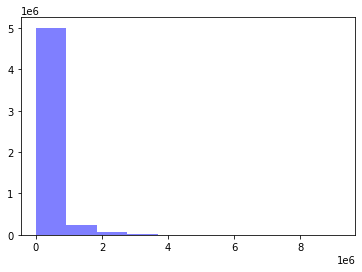

In [ ]:
# Check with histogram or Shapiro-Wilks test whether there is a normally distributed dependent variable 'bail'
plt.hist(df.Bond, facecolor='blue', alpha=0.5)

plt.show()

In [ ]:

df_B = df[df.RACE == 'BLACK']
df_B

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018
8,2020-05-13,BLACK,M,43,10000,INTERFERING WITH AN OFFICER AM,2020
9,2020-03-11,BLACK,M,29,50000,"LARCENY, SECOND DEGREE CF",2020
10,2019-09-18,BLACK,M,46,70000,VIOLATION OF PROBATION OR COND DISCHG,2019
12,2019-09-23,BLACK,F,42,70050,"ASSAULT, SECOND DEGREE DF",2019
...,...,...,...,...,...,...,...
5351837,2021-02-05,BLACK,M,23,125000,CRIMINAL POSSESSION OF A PISTOL DF,2021
5351838,2021-03-01,BLACK,M,29,500000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2021
5351841,2014-08-13,BLACK,M,33,750150,SALE OF NARC/AMPHET BY NON-DEPENDENT F,2014
5351842,2019-11-13,BLACK,F,40,291900,IDENTITY THEFT 1ST DEGREE BF,2019


In [ ]:
df_sample = df.sample(n=500, random_state=15)

In [ ]:
df_sample

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
861919,2017-04-28,BLACK,M,29,100000,ASSAULT ON POLICE OR FIRE OFFICER CF,2017
159232,2015-09-10,HISPANIC,M,38,500000,CRIMINAL POSSESSION OF A PISTOL DF,2015
4695182,2020-03-12,BLACK,M,24,25000,"FORGERY, SECOND DEGREE DF",2020
3798380,2019-10-15,HISPANIC,M,25,50000,ARREST WITHOUT WARRANT,2019
2760222,2018-08-17,BLACK,M,29,125400,CRIM VIOL OF PROTECTIVE ORDER AM,2018
...,...,...,...,...,...,...,...
1347059,2017-09-27,HISPANIC,M,25,200000,VIOLATION OF PROBATION OR COND DISCHG,2017
1078873,2016-12-05,BLACK,M,26,75000,"ROBBERY, FIRST DEGREE BF",2016
4436705,2019-10-11,BLACK,M,33,60500,VIOLATE COND OF RELEASE-2ND DEG AM,2019
2723693,2018-08-08,HISPANIC,M,22,2500,INJURY OR RISK OF INJURY TO MINOR F,2018


In [ ]:
import plotly.express as px

fig = px.scatter(df_sample, x="Year", y="Bond", color="RACE",
                 title="Bond Amount by Race and Year")
fig.show()

In [ ]:
df_2014on = df[df.Year >= 2014]
df_2014on.head()

,Date,RACE,GENDER,AGE,Bond,OFFENSE,Year
0,2018-08-16,BLACK,M,27,150000,CRIMINAL POSS OF PISTOL/REVOLVER DF,2018
1,2019-03-28,HISPANIC,M,41,30100,VIOLATION OF PROBATION OR COND DISCHG,2019
2,2020-04-03,HISPANIC,M,21,150000,CRIMINAL ATTEMPT,2020
3,2020-01-15,WHITE,M,36,50500,CRIM VIOL OF PROTECTIVE ORDER DF,2020
4,2018-12-26,HISPANIC,M,29,100000,CRIMINAL ATTEMPT,2018


In [ ]:
df_2014onsample = df_2014on.sample(n=500, random_state=16)

In [ ]:
import plotly.express as px

fig = px.scatter(df_2014onsample, x="Year", y="Bond", color="RACE",
                 title="Numeric 'size' values mean continuous color")
fig.show()

In [ ]:
df_2014onsamplelarge = df_2014on.sample(n=5000, random_state=17)

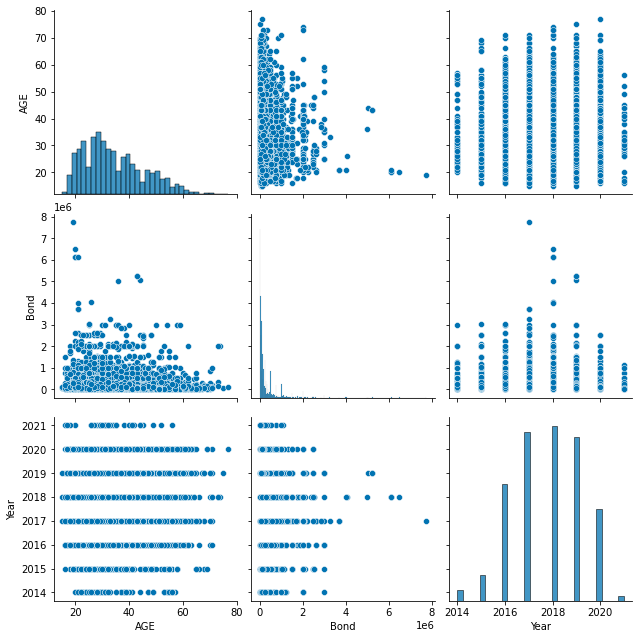

In [ ]:
# Visualize the data using scatter plot and histogram
sns.set_palette('colorblind')
sns.pairplot(data=df_2014onsamplelarge, height=3)

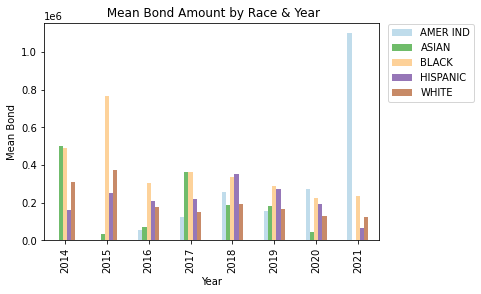

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_2014onsamplelarge.groupby(['Year', 'RACE'])['Bond'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.30, 1.018])

plt.title(' Mean Bond Amount by Race & Year')
plt.xlabel('Year')
plt.ylabel('Mean Bond')

plt.savefig('mean_race_year.png', dpi=300, bbox_inches = 'tight')

In [ ]:
t1 = df_2014onsamplelarge.groupby(['Year', 'RACE'])['Bond'].mean()
t1

Year  RACE    
2014  ASIAN       5.000000e+05
      BLACK       4.905914e+05
      HISPANIC    1.591750e+05
      WHITE       3.120625e+05
2015  ASIAN       3.157500e+04
      BLACK       7.681585e+05
      HISPANIC    2.544637e+05
      WHITE       3.760688e+05
2016  AMER IND    5.280000e+04
      ASIAN       7.250000e+04
      BLACK       3.057949e+05
      HISPANIC    2.103202e+05
      WHITE       1.799773e+05
2017  AMER IND    1.235000e+05
      ASIAN       3.660200e+05
      BLACK       3.621053e+05
      HISPANIC    2.195107e+05
      WHITE       1.492839e+05
2018  AMER IND    2.575000e+05
      ASIAN       1.900000e+05
      BLACK       3.394104e+05
      HISPANIC    3.528824e+05
      WHITE       1.942387e+05
2019  AMER IND    1.588000e+05
      ASIAN       1.820833e+05
      BLACK       2.888163e+05
      HISPANIC    2.711024e+05
      WHITE       1.668061e+05
2020  AMER IND    2.750000e+05
      ASIAN       4.400000e+04
      BLACK       2.273417e+05
      HISPANIC    1.9601

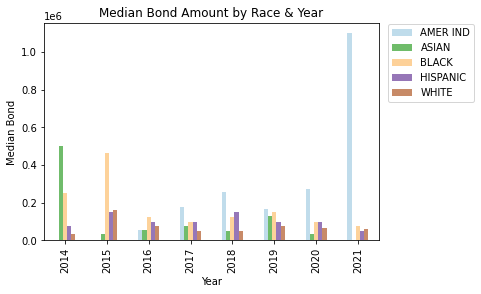

In [ ]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_2014onsamplelarge.groupby(['Year', 'RACE'])['Bond'].median().unstack().plot.bar(colormap='Paired', alpha = 0.7)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.30, 1.018])

plt.title('Median Bond Amount by Race & Year')
plt.xlabel('Year')
plt.ylabel('Median Bond')

plt.savefig('Median_race_year.png', dpi=300, bbox_inches = 'tight')

**Black Bail Stats**

In [ ]:
df_B = df[(df["RACE"] == 'BLACK')]
df_B.value_counts


<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
8       2020-05-13  BLACK  ...  INTERFERING WITH AN OFFICER           AM  2020
9       2020-03-11  BLACK  ...  LARCENY, SECOND DEGREE                CF  2020
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[2206677 ro

In [ ]:
df_BB10 = df[(df["RACE"] == 'BLACK') & (df["Bond"] >= 10000)]
print(df_BB10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
8       2020-05-13  BLACK  ...  INTERFERING WITH AN OFFICER           AM  2020
9       2020-03-11  BLACK  ...  LARCENY, SECOND DEGREE                CF  2020
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[2071299 ro

In [ ]:
df_BB5 = df[(df["RACE"] == 'BLACK') & (df["Bond"] >= 5000)]
print(df_BB5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
8       2020-05-13  BLACK  ...  INTERFERING WITH AN OFFICER           AM  2020
9       2020-03-11  BLACK  ...  LARCENY, SECOND DEGREE                CF  2020
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[2142862 ro

In [ ]:
df_BB1 = df[(df["RACE"] == 'BLACK') & (df["Bond"] >= 1000)]
print(df_BB1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
8       2020-05-13  BLACK  ...  INTERFERING WITH AN OFFICER           AM  2020
9       2020-03-11  BLACK  ...  LARCENY, SECOND DEGREE                CF  2020
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[2188197 ro

In [ ]:
df_BB50 = df[(df["RACE"] == 'BLACK') & (df["Bond"] >= 50000)]
print(df_BB50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
9       2020-03-11  BLACK  ...  LARCENY, SECOND DEGREE                CF  2020
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
13      2020-03-18  BLACK  ...                            ARREST WARRANT  2020
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[1679436 ro

In [ ]:
df_BB100 = df[(df["RACE"] == 'BLACK') & (df["Bond"] >= 100000)]
print(df_BB100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
0       2018-08-16  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
13      2020-03-18  BLACK  ...                            ARREST WARRANT  2020
22      2018-01-16  BLACK  ...  MURDER                                AF  2018
23      2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
...            ...    ...  ...                                       ...   ...
5351837 2021-02-05  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2021
5351838 2021-03-01  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351841 2014-08-13  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2014
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351844 2014-01-02  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014

[1292210 ro

In [ ]:
#Percent of Black Defendants who had a bail over $10,000
2071299/2206677 * 100

93.86507404572578

In [ ]:
#Percent of Black Defendants who had a bail over $5,000
2142862/2206677 * 100

97.10809511314977

In [ ]:
#Percent of Black Defendants who had a bail over $1,000
2188197/2206677 * 100

99.16254168598304

In [ ]:
#Percent of Black Defendants who had a bail over $50,000
1679436/2206677 * 100

76.10701520884116

In [ ]:
#Percent of Black Defendants who had a bail over $50,000
1292210/2206677 * 100

58.55909133960249

**White Bail Stats**

In [ ]:
df_W = df[(df["RACE"] == 'WHITE')]
df_W.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3       2020-01-15  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
7       2018-12-03  WHITE  ...  ASSAULT 2ND, VICTIM 60 OR OVER        DF  2018
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[1663676 ro

In [ ]:
df_WB10 = df[(df["RACE"] == 'WHITE') & (df["Bond"] >= 10000)]
print(df_WB10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3       2020-01-15  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
7       2018-12-03  WHITE  ...  ASSAULT 2ND, VICTIM 60 OR OVER        DF  2018
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[1492366 ro

In [ ]:
#Percent of WHITE Defendants who had a bail over $10,000
1492366/1663676 * 100

89.70292292489643

In [ ]:
df_WB5 = df[(df["RACE"] == 'WHITE') & (df["Bond"] >= 5000)]
print(df_WB5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3       2020-01-15  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
7       2018-12-03  WHITE  ...  ASSAULT 2ND, VICTIM 60 OR OVER        DF  2018
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[1587622 ro

In [ ]:
#Percent of WHITE Defendants who had a bail over $5,000
1587622/1663676 * 100

95.42855700268562

In [ ]:
df_WB1 = df[(df["RACE"] == 'WHITE') & (df["Bond"] >= 1000)]
print(df_WB1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3       2020-01-15  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
7       2018-12-03  WHITE  ...  ASSAULT 2ND, VICTIM 60 OR OVER        DF  2018
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[1646603 ro

In [ ]:
#Percent of WHITE Defendants who had a bail over $1,000
1646603/1663676 * 100

98.97377854822695

In [ ]:
df_WB50 = df[(df["RACE"] == 'WHITE') & (df["Bond"] >= 50000)]
print(df_WB50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3       2020-01-15  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
7       2018-12-03  WHITE  ...  ASSAULT 2ND, VICTIM 60 OR OVER        DF  2018
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[1003572 ro

In [ ]:
#Percent of WHITE Defendants who had a bail over $50,000
1003572/1663676 * 100

60.32256280670034

In [ ]:
df_WB100 = df[(df["RACE"] == 'WHITE') & (df["Bond"] >= 100000)]
print(df_WB100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
5       2020-01-03  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
29      2017-01-12  WHITE  ...  MURDER                                AF  2017
...            ...    ...  ...                                       ...   ...
5351835 2020-10-13  WHITE  ...  HOME INVASION                         AF  2020
5351840 2020-08-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2020
5351843 2020-10-05  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2020
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019
5351848 2021-02-05  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2021

[651972 row

In [ ]:
#Percent of WHITE Defendants who had a bail over $50,000
651972/1663676 * 100

39.18864009578788

**Hispanic**

In [ ]:
df_H = df[(df["RACE"] == 'HISPANIC')]
df_H.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
...            ...       ...  ...                                       ...   ...
5351831 2020-12-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2020
5351832 2014-11-06  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2014
5351839 2020-10-07  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
df_HB100 = df[(df["RACE"] == 'HISPANIC') & (df["Bond"] >= 100000)]
print(df_HB100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351794 2020-10-13  HISPANIC  ...  THREATENING                           AM  2020
5351798 2020-10-09  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2020
5351815 2020-09-14  HISPANIC  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351823 2021-03-23  HISPANIC  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2021
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
#Percent of HISPANIC Defendants who had a bail over $100,000
801214/1432744 * 100

55.921644062023645

In [ ]:
df_HB50 = df[(df["RACE"] == 'HISPANIC') & (df["Bond"] >= 50000)]
print(df_HB50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351831 2020-12-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2020
5351832 2014-11-06  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2014
5351839 2020-10-07  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
#Percent of HISPANIC Defendants who had a bail over $50,000
1061617/1432744 * 100

74.09676815955956

In [ ]:
df_HB10 = df[(df["RACE"] == 'HISPANIC') & (df["Bond"] >= 10000)]
print(df_HB10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
...            ...       ...  ...                                       ...   ...
5351831 2020-12-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2020
5351832 2014-11-06  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2014
5351839 2020-10-07  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
#Percent of HISPANIC Defendants who had a bail over $10,000
1337180/1432744 * 100

93.33000173094426

In [ ]:
df_HB5 = df[(df["RACE"] == 'HISPANIC') & (df["Bond"] >= 5000)]
print(df_HB5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
...            ...       ...  ...                                       ...   ...
5351831 2020-12-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2020
5351832 2014-11-06  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2014
5351839 2020-10-07  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
#Percent of HISPANIC Defendants who had a bail over $10,000
1386920/1432744 * 100

96.80166170648769

In [ ]:
df_HB1 = df[(df["RACE"] == 'HISPANIC') & (df["Bond"] >= 1000)]
print(df_HB1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
6       2020-03-19  HISPANIC  ...  CRIM VIOL ST CRIM RESTR ORDER         DF  2020
11      2018-05-03  HISPANIC  ...  MURDER                                AF  2018
...            ...       ...  ...                                       ...   ...
5351831 2020-12-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2020
5351832 2014-11-06  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2014
5351839 2020-10-07  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL

In [ ]:
#Percent of HISPANIC Defendants who had a bail over $10,000
1420476/1432744 * 100

99.14374096139994

**Asian**

In [ ]:
df_A = df[(df["RACE"] == 'ASIAN')]
df_A.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
402     2005-03-09  ASIAN  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2005
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
...            ...    ...  ...                                       ...   ...
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351086 2021-02-23  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351128 2020-10-26  ASIAN  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021
5351728 2021-01-12  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021

[31994 rows

In [ ]:
df_AB1 = df[(df["RACE"] == 'ASIAN') & (df["Bond"] >= 1000)]
print(df_AB1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
402     2005-03-09  ASIAN  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2005
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
...            ...    ...  ...                                       ...   ...
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351086 2021-02-23  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351128 2020-10-26  ASIAN  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021
5351728 2021-01-12  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021

[31816 rows

In [ ]:
#Percent of ASIAN Defendants who had a bail over $1,000
31816/31994 * 100

99.44364568356568

In [ ]:
df_AB5 = df[(df["RACE"] == 'ASIAN') & (df["Bond"] >= 5000)]
print(df_AB5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
402     2005-03-09  ASIAN  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2005
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
...            ...    ...  ...                                       ...   ...
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351086 2021-02-23  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351128 2020-10-26  ASIAN  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021
5351728 2021-01-12  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021

[30150 rows

In [ ]:
#Percent of ASIAN Defendants who had a bail over $5,000
30150/31994 * 100

94.23641932862412

In [ ]:
df_AB10 = df[(df["RACE"] == 'ASIAN') & (df["Bond"] >= 10000)]
print(df_AB10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
402     2005-03-09  ASIAN  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2005
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
1734    2018-09-27  ASIAN  ...  ARSON, FIRST DEGREE                   AF  2018
...            ...    ...  ...                                       ...   ...
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351086 2021-02-23  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351128 2020-10-26  ASIAN  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021
5351728 2021-01-12  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021

[28244 rows

In [ ]:
#Percent of ASIAN Defendants who had a bail over $10,000
28244/31994 * 100

88.27905232231043

In [ ]:
df_AB50 = df[(df["RACE"] == 'ASIAN') & (df["Bond"] >= 50000)]
print(df_AB50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
402     2005-03-09  ASIAN  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2005
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
1734    2018-09-27  ASIAN  ...  ARSON, FIRST DEGREE                   AF  2018
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
...            ...    ...  ...                                       ...   ...
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351086 2021-02-23  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351128 2020-10-26  ASIAN  ...  ROBBERY, FIRST DEGREE                 BF  2020
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021

[21810 rows

In [ ]:
#Percent of ASIAN Defendants who had a bail over $50,000
21810/31994 * 100

68.16903169344252

In [ ]:
df_AB100 = df[(df["RACE"] == 'ASIAN') & (df["Bond"] >= 100000)]
print(df_AB100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
242     2018-03-01  ASIAN  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2018
1245    2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
1734    2018-09-27  ASIAN  ...  ARSON, FIRST DEGREE                   AF  2018
1948    2018-12-14  ASIAN  ...                          CRIMINAL ATTEMPT  2018
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
...            ...    ...  ...                                       ...   ...
5350183 2021-03-29  ASIAN  ...  BURGLARY, FIRST DEGREE                BF  2021
5350383 2018-08-07  ASIAN  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2018
5350388 2020-10-06  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2020
5350776 2021-03-05  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2021
5351516 2021-01-27  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2021

[15689 rows

In [ ]:
#Percent of ASIAN Defendants who had a bail over $100,000
15689/31994 * 100

49.03731949740576

**Native American**

In [ ]:
df_NA = df[(df["RACE"] == 'AMER IND')]
df_NA.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
732     2020-03-09  AMER IND  ...  INJURY OR RISK OF INJURY TO MINOR      F  2020
733     2020-01-16  AMER IND  ...               CARRY PIST/RVOLV W/O PERMIT  2020
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
1814    2020-05-01  AMER IND  ...  ASSAULT, SECOND DEGREE                DF  2020
...            ...       ...  ...                                       ...   ...
5350311 2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
2206677+1663676+1432744+31994+16758

5351849

In [ ]:
2206677/5351849 * 100

41.23204896102263

In [ ]:
1663676/5351849 * 100

31.086004108112913

In [ ]:
1432744/5351849 * 100

26.771009421229934

In [ ]:
31994/5351849 * 100

0.5978120832631862

In [ ]:
16758/5351849 * 100

0.31312542637133445

In [ ]:
df_NA100 = df[(df["RACE"] == 'AMER IND') & (df["Bond"] >= 100000)]
print(df_NA100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3796    2016-06-07  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2016
...            ...       ...  ...                                       ...   ...
5349856 2021-03-01  AMER IND  ...  ARSON, SECOND DEGREE                  BF  2021
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
#Percent of NATIVE AMERICAN Defendants who had a bail over $100,000
8751/16758 * 100

52.21983530254207

In [ ]:
df_NA50 = df[(df["RACE"] == 'AMER IND') & (df["Bond"] >= 50000)]
print(df_NA50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
733     2020-01-16  AMER IND  ...               CARRY PIST/RVOLV W/O PERMIT  2020
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
1814    2020-05-01  AMER IND  ...  ASSAULT, SECOND DEGREE                DF  2020
2041    2020-01-23  AMER IND  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
...            ...       ...  ...                                       ...   ...
5350311 2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
#Percent of NATIVE AMERICAN Defendants who had a bail over $50,000
12163/16758 * 100

72.58026017424514

In [ ]:
df_NA10 = df[(df["RACE"] == 'AMER IND') & (df["Bond"] >= 10000)]
print(df_NA10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
732     2020-03-09  AMER IND  ...  INJURY OR RISK OF INJURY TO MINOR      F  2020
733     2020-01-16  AMER IND  ...               CARRY PIST/RVOLV W/O PERMIT  2020
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
1814    2020-05-01  AMER IND  ...  ASSAULT, SECOND DEGREE                DF  2020
...            ...       ...  ...                                       ...   ...
5350311 2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
#Percent of NATIVE AMERICAN Defendants who had a bail over $10,000
15384/16758 * 100

91.80093089867526

In [ ]:
df_NA5 = df[(df["RACE"] == 'AMER IND') & (df["Bond"] >= 5000)]
print(df_NA5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
732     2020-03-09  AMER IND  ...  INJURY OR RISK OF INJURY TO MINOR      F  2020
733     2020-01-16  AMER IND  ...               CARRY PIST/RVOLV W/O PERMIT  2020
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
1814    2020-05-01  AMER IND  ...  ASSAULT, SECOND DEGREE                DF  2020
...            ...       ...  ...                                       ...   ...
5350311 2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
#Percent of NATIVE AMERICAN Defendants who had a bail over $50,000
15981/16758 * 100

95.36340852130326

In [ ]:
df_NA1 = df[(df["RACE"] == 'AMER IND') & (df["Bond"] >= 1000)]
print(df_NA1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
732     2020-03-09  AMER IND  ...  INJURY OR RISK OF INJURY TO MINOR      F  2020
733     2020-01-16  AMER IND  ...               CARRY PIST/RVOLV W/O PERMIT  2020
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
1804    2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
1814    2020-05-01  AMER IND  ...  ASSAULT, SECOND DEGREE                DF  2020
...            ...       ...  ...                                       ...   ...
5350311 2017-08-30  AMER IND  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2017
5350557 2021-02-09  AMER IND  ...  HOME INVASION                         AF  2021
5350875 2021-03-31  AMER IND  ...  ASSAULT, SECOND DEGREE                 F  2021
5351364 2020-08-18  AMER IND  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2020
5351609 2020-09-18  AMER IND  ...  HOME INVASION          

In [ ]:
#Percent of NATIVE AMERICAN Defendants who had a bail over $1,000
16706/16758 * 100

99.68970044158014

**2015 Stats**

In [ ]:
# Dataset 2015
df_2015 = df[(df['Year'] == 2015)]
df_2015.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
250     2015-11-12  HISPANIC  ...                   POSSESSION OF NARCOTICS  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
467     2015-12-22     WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
564     2015-04-14     BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
...            ...       ...  ...                                       ...   ...
5351333 2015-08-24     BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03     BLACK  ...                          CRIMINAL ATTEMPT  2015
5351482 2015-08-16     WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
5351674 2015-09-09     BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015
5351760 2015-05-27     BLACK  ...  ASSAULT, THIRD DEGREE  

**Black 2015**

In [ ]:
df_2015B = df_2015[(df_2015["RACE"] == 'BLACK')]
df_2015B.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1207    2015-06-22  BLACK  ...  OPERATE UNDER INFLU OF LIQ OR DRUGS    M  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
...            ...    ...  ...                                       ...   ...
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015
5351760 2015-05-27  BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2015

[81089 rows

In [ ]:
df_2015B1 = df_2015B[df_2015B["Bond"] >= 1000]
print(df_2015B1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
1681    2015-12-14  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2015
...            ...    ...  ...                                       ...   ...
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015
5351760 2015-05-27  BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2015

[79750 rows

In [ ]:
# Percent with bail over $1000
79750/81089 * 100

98.34872794090444

In [ ]:
df_2015B5 = df_2015B[df_2015B["Bond"] >= 5000]
print(df_2015B5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
1681    2015-12-14  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2015
...            ...    ...  ...                                       ...   ...
5351089 2015-05-15  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2015
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015

[78809 rows

In [ ]:
# Percent with bail over $5000
78809/81089 * 100

97.18827461184625

In [ ]:
df_2015B10 = df_2015B[df_2015B["Bond"] >= 10000]
print(df_2015B10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
1681    2015-12-14  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2015
...            ...    ...  ...                                       ...   ...
5351089 2015-05-15  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2015
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015

[77928 rows

In [ ]:
# Percent with bail over $10000
77928/81089 * 100

96.10181405616052

In [ ]:
df_2015B50 = df_2015B[df_2015B["Bond"] >= 50000]
print(df_2015B50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
1681    2015-12-14  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2015
...            ...    ...  ...                                       ...   ...
5351089 2015-05-15  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2015
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015

[74652 rows

In [ ]:
# Percent with bail over $50000
74652/81089 * 100

92.0618086300238

In [ ]:
df_2015B100 = df_2015B[df_2015B["Bond"] >= 100000]
print(df_2015B100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
564     2015-04-14  BLACK  ...  ASSAULT, FIRST DEGREE                 BF  2015
708     2015-02-23  BLACK  ...                          CRIMINAL ATTEMPT  2015
1214    2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
1628    2015-10-14  BLACK  ...  SELLING WEAPONS TO ALIENS PROHIBITED   F  2015
1681    2015-12-14  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2015
...            ...    ...  ...                                       ...   ...
5351089 2015-05-15  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2015
5351140 2015-09-11  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351333 2015-08-24  BLACK  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2015
5351460 2015-11-03  BLACK  ...                          CRIMINAL ATTEMPT  2015
5351674 2015-09-09  BLACK  ...  BURGLARY, FIRST DEGREE                BF  2015

[66558 rows

In [ ]:
# Percent with bail over $100000
66558/81089 * 100

82.08018350207796

**White 2015**

In [ ]:
df_2015W = df_2015[(df_2015["RACE"] == 'WHITE')]
df_2015W.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
1735    2015-10-26  WHITE  ...  LARCENY, SIXTH DEGREE                 CM  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
...            ...    ...  ...                                       ...   ...
5350147 2015-03-25  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2015
5350548 2015-08-17  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2015
5351100 2015-09-18  WHITE  ...  ASSAULT, THIRD DEGREE                 AM  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
5351482 2015-08-16  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015

[34401 rows

In [ ]:
df_2015W1 = df_2015W[df_2015W["Bond"] >= 1000]
print(df_2015W1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
1735    2015-10-26  WHITE  ...  LARCENY, SIXTH DEGREE                 CM  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
...            ...    ...  ...                                       ...   ...
5349836 2015-08-03  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2015
5350548 2015-08-17  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2015
5351100 2015-09-18  WHITE  ...  ASSAULT, THIRD DEGREE                 AM  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
5351482 2015-08-16  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015

[33402 rows

In [ ]:
# Percent with bail over $1000
33402/34401 * 100

97.09601465073689

In [ ]:
df_2015W5 = df_2015W[df_2015W["Bond"] >= 5000]
print(df_2015W5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
1735    2015-10-26  WHITE  ...  LARCENY, SIXTH DEGREE                 CM  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
...            ...    ...  ...                                       ...   ...
5349494 2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
5349836 2015-08-03  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2015
5350548 2015-08-17  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
5351482 2015-08-16  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015

[32609 rows

In [ ]:
# Percent with bail over $5000
32609/34401 * 100

94.79084910322374

In [ ]:
df_2015W10 = df_2015W[df_2015W["Bond"] >= 10000]
print(df_2015W10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
1735    2015-10-26  WHITE  ...  LARCENY, SIXTH DEGREE                 CM  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
...            ...    ...  ...                                       ...   ...
5349494 2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
5349836 2015-08-03  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2015
5350548 2015-08-17  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
5351482 2015-08-16  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015

[31796 rows

In [ ]:
# Percent with bail over $10000
31796/34401 * 100

92.4275457108805

In [ ]:
df_2015W50 = df_2015W[df_2015W["Bond"] >= 50000]
print(df_2015W50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
1735    2015-10-26  WHITE  ...  LARCENY, SIXTH DEGREE                 CM  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
...            ...    ...  ...                                       ...   ...
5349328 2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
5349494 2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
5349836 2015-08-03  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2015
5350548 2015-08-17  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015

[28808 rows

In [ ]:
# Percent with bail over $50000
28808/34401 * 100

83.74175169326473

In [ ]:
df_2015W100 = df_2015W[df_2015W["Bond"] >= 100000]
print(df_2015W100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
467     2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
877     2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
1507    2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015
2409    2015-10-22  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2015
2414    2015-09-24  WHITE  ...  MURDER                                AF  2015
...            ...    ...  ...                                       ...   ...
5349140 2015-09-24  WHITE  ...  MANSLAUGHTER, FIRST DEGREE            BF  2015
5349328 2015-12-22  WHITE  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2015
5349494 2015-07-14  WHITE  ...     CRIMINAL LIABILITY FOR ANOTHER PERSON  2015
5349836 2015-08-03  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2015
5351159 2015-05-06  WHITE  ...  ARSON, FIRST DEGREE                   AF  2015

[24466 rows

In [ ]:
# Percent with bail over $100000
24466/34401 * 100

71.12002558065173

**Hispanic 2015**

In [ ]:
df_2015H = df_2015[(df_2015["RACE"] == 'HISPANIC')]
df_2015H.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
250     2015-11-12  HISPANIC  ...                   POSSESSION OF NARCOTICS  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1040    2015-07-15  HISPANIC  ...  CRIMINAL MISCHIEF, SECOND DEGREE      AM  2015
...            ...       ...  ...                                       ...   ...
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2015
5351099 2015-06-15  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2015
5351181 2015-12-21  HISPANIC  ...  SALE OF HALLUCIGEN/NARC

In [ ]:
df_2015H1 = df_2015H[df_2015H["Bond"] >= 1000]
print(df_2015H1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1040    2015-07-15  HISPANIC  ...  CRIMINAL MISCHIEF, SECOND DEGREE      AM  2015
1241    2015-01-29  HISPANIC  ...  INTERFERING WITH AN OFFICER           AM  2015
...            ...       ...  ...                                       ...   ...
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2015
5351099 2015-06-15  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2015
5351181 2015-12-21  HISPANIC  ...  SALE OF HALLUCIGEN/NARC

In [ ]:
# Percent with bail over $1000
31899/32403 * 100

98.44458846403111

In [ ]:
df_2015H5 = df_2015H[df_2015H["Bond"] >= 5000]
print(df_2015H5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1040    2015-07-15  HISPANIC  ...  CRIMINAL MISCHIEF, SECOND DEGREE      AM  2015
1241    2015-01-29  HISPANIC  ...  INTERFERING WITH AN OFFICER           AM  2015
...            ...       ...  ...                                       ...   ...
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2015
5351099 2015-06-15  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2015
5351181 2015-12-21  HISPANIC  ...  SALE OF HALLUCIGEN/NARC

In [ ]:
# Percent with bail over $5000
31621/32403 * 100

97.58664321204826

In [ ]:
df_2015H10 = df_2015H[df_2015H["Bond"] >= 10000]
print(df_2015H10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1241    2015-01-29  HISPANIC  ...  INTERFERING WITH AN OFFICER           AM  2015
1647    2015-07-31  HISPANIC  ...                          CRIMINAL ATTEMPT  2015
...            ...       ...  ...                                       ...   ...
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2015
5351099 2015-06-15  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2015
5351181 2015-12-21  HISPANIC  ...  SALE OF HALLUCIGEN/NARC

In [ ]:
# Percent with bail over $10000
30850/32403 * 100

95.20723389809585

In [ ]:
df_2015H50 = df_2015H[df_2015H["Bond"] >= 50000]
print(df_2015H50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
109     2015-06-15  HISPANIC  ...                            SPECIAL PAROLE  2015
380     2015-11-24  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2015
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1241    2015-01-29  HISPANIC  ...  INTERFERING WITH AN OFFICER           AM  2015
1647    2015-07-31  HISPANIC  ...                          CRIMINAL ATTEMPT  2015
...            ...       ...  ...                                       ...   ...
5349281 2015-08-06  HISPANIC  ...  KIDNAPPING, FIRST DEGREE              AF  2015
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2015
5351099 2015-06-15  HISPANIC  ...  LARCENY, SECOND DEGREE 

In [ ]:
# Percent with bail over $50000
28436/32403 * 100

87.75730642224485

In [ ]:
df_2015H100 = df_2015H[df_2015H["Bond"] >= 100000]
print(df_2015H100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
917     2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                DF  2015
1241    2015-01-29  HISPANIC  ...  INTERFERING WITH AN OFFICER           AM  2015
1647    2015-07-31  HISPANIC  ...                          CRIMINAL ATTEMPT  2015
2753    2015-08-04  HISPANIC  ...                                CONSPIRACY  2015
2786    2015-09-08  HISPANIC  ...  HOME INVASION                         AF  2015
...            ...       ...  ...                                       ...   ...
5348972 2015-07-14  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2015
5349281 2015-08-06  HISPANIC  ...  KIDNAPPING, FIRST DEGREE              AF  2015
5349620 2015-03-12  HISPANIC  ...  LARCENY, THIRD DEGREE                 DF  2015
5349624 2015-07-06  HISPANIC  ...  ASSAULT, SECOND DEGREE                 F  2015
5350733 2015-06-24  HISPANIC  ...  CRIMINAL POSSESSION OF 

In [ ]:
# Percent with bail over $100000
24141/32403 * 100

74.50236089250996

**Asian 2015**

In [ ]:
df_2015A = df_2015[(df_2015["RACE"] == 'ASIAN')]
df_2015A.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
3543    2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
4557    2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080    2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5764    2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
...            ...    ...  ...                                       ...   ...
5164085 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5166445 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5169418 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5172881 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5175327 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015

[824 rows x

In [ ]:
df_2015A1 = df_2015A[df_2015A["Bond"] >= 1000]
print(df_2015A1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
3543    2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
4557    2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080    2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5764    2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
...            ...    ...  ...                                       ...   ...
5164085 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5166445 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5169418 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5172881 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5175327 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015

[824 rows x

In [ ]:
# Percent with bail over $1000
824/824 * 100

100.0

In [ ]:
df_2015A5 = df_2015A[df_2015A["Bond"] >= 5000]
print(df_2015A5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
907     2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
3543    2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
4557    2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080    2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5764    2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
...            ...    ...  ...                                       ...   ...
5164085 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5166445 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5169418 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5172881 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5175327 2015-05-27  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015

[819 rows x

In [ ]:
# Percent with bail over $5000
819/824 * 100

99.39320388349515

In [ ]:
df_2015A10 = df_2015A[df_2015A["Bond"] >= 10000]
print(df_2015A10.value_counts)

<bound method DataFrame.value_counts of              Date   RACE  ...                                   OFFENSE  Year
3543   2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
4557   2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080   2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5764   2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
5813   2015-12-21  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
...           ...    ...  ...                                       ...   ...
493951 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
497941 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
500304 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
503833 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
505395 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015

[451 rows x 7 columns]>

In [ ]:
# Percent with bail over $10000
451/824 * 100

54.73300970873787

In [ ]:
df_2015A50 = df_2015A[df_2015A["Bond"] >= 50000]
print(df_2015A50.value_counts)

<bound method DataFrame.value_counts of              Date   RACE  ...                                   OFFENSE  Year
3543   2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
4557   2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080   2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
5764   2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
6189   2015-11-09  ASIAN  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2015
...           ...    ...  ...                                       ...   ...
493951 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
497941 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
500304 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
503833 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
505395 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015

[392 rows x 7 columns]>

In [ ]:
# Percent with bail over $50000
392/824 * 100

47.57281553398058

In [ ]:
df_2015A100 = df_2015A[df_2015A["Bond"] >= 100000]
print(df_2015A100.value_counts)

<bound method DataFrame.value_counts of              Date   RACE  ...                                   OFFENSE  Year
4557   2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
5080   2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
6495   2015-10-23  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2015
6526   2015-12-15  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2015
8764   2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
...           ...    ...  ...                                       ...   ...
493951 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
497941 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
500304 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
503833 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015
505395 2015-02-23  ASIAN  ...  ASSAULT, 1ST VICTIM 60 OR OVER        BF  2015

[284 rows x 7 columns]>

In [ ]:
# Percent with bail over $100000
284/824 * 100

34.46601941747573

**Native American 2015**

In [ ]:
df_2015NA = df_2015[(df_2015["RACE"] == 'AMER IND')]
df_2015NA.value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: [Date, RACE, GENDER, AGE, Bond, OFFENSE, Year]
Index: []>

**2019**

In [ ]:
# Dataset 2019
df_2019 = df[(df['Year'] == 2019)]
df_2019.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
10      2019-09-18     BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23     BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
14      2019-09-10     WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05     WHITE  ...                         YOUTHFUL OFFENDER  2019
...            ...       ...  ...                                       ...   ...
5351813 2019-12-04     BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05     BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21     BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13     BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019
5351846 2019-08-12     WHITE  ...  HOME INVASION          

**Black 2019**

In [ ]:
df_2019B = df_2019[(df_2019["RACE"] == 'BLACK')]
df_2019B.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
...            ...    ...  ...                                       ...   ...
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05  BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[451886 row

In [ ]:
451886/1102431 *100

40.98995764814306

In [ ]:
df_2019B1 = df_2019B[df_2019B["Bond"] >= 1000]
print(df_2019B1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
...            ...    ...  ...                                       ...   ...
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05  BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[449366 row

In [ ]:
# Percent with bail over $1000
449366/451886 * 100

99.44233722664566

In [ ]:
df_2019B5 = df_2019B[df_2019B["Bond"] >= 5000]
print(df_2019B5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
...            ...    ...  ...                                       ...   ...
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05  BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[439900 row

In [ ]:
# Percent with bail over $5000
439900/451886 * 100

97.34756111054558

In [ ]:
df_2019B10 = df_2019B[df_2019B["Bond"] >= 10000]
print(df_2019B10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
...            ...    ...  ...                                       ...   ...
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05  BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[426515 row

In [ ]:
# Percent with bail over $10000
426515/451886 * 100

94.38553086397897

In [ ]:
df_2019B50 = df_2019B[df_2019B["Bond"] >= 50000]
print(df_2019B50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
10      2019-09-18  BLACK  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
12      2019-09-23  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2019
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
...            ...    ...  ...                                       ...   ...
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351820 2019-12-05  BLACK  ...  ASSAULT, SECOND DEGREE                 F  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[351746 row

In [ ]:
# Percent with bail over $50000
351746/451886 * 100

77.83954360170485

In [ ]:
df_2019B100 = df_2019B[df_2019B["Bond"] >= 100000]
print(df_2019B100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
24      2019-07-05  BLACK  ...  ASSAULT 2ND DEGREE WITH A FIREARM     DF  2019
43      2019-02-11  BLACK  ...  STEALING A FIREARM                    DF  2019
52      2019-08-29  BLACK  ...  HOME INVASION                         AF  2019
56      2019-08-16  BLACK  ...  CRIMINAL POSSESSION OF A PISTOL       DF  2019
57      2019-08-13  BLACK  ...  BURGLARY, SECOND DEGREE               CF  2019
...            ...    ...  ...                                       ...   ...
5351740 2019-12-17  BLACK  ...  MURDER                                AF  2019
5351769 2019-09-10  BLACK  ...  MURDER                                AF  2019
5351813 2019-12-04  BLACK  ...                          CRIMINAL ATTEMPT  2019
5351833 2019-11-21  BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2019
5351842 2019-11-13  BLACK  ...  IDENTITY THEFT 1ST DEGREE             BF  2019

[280292 row

In [ ]:
# Percent with bail over $100000
280292/451886 * 100

62.02714844009329

**White 2019**

In [ ]:
df_2019W = df_2019[(df_2019["RACE"] == 'WHITE')]
df_2019W.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
21      2019-11-18  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
...            ...    ...  ...                                       ...   ...
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351754 2019-11-21  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2019
5351789 2019-08-12  WHITE  ...  ESCAPE, FIRST DEGREE                  CF  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[338006 row

In [ ]:
338006/1102431 *100

30.660059450432726

In [ ]:
df_2019W1 = df_2019W[df_2019W["Bond"] >= 1000]
print(df_2019W1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
21      2019-11-18  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
...            ...    ...  ...                                       ...   ...
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351754 2019-11-21  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2019
5351789 2019-08-12  WHITE  ...  ESCAPE, FIRST DEGREE                  CF  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[335671 row

In [ ]:
# Percent with bail over $1000
335671/338006 * 100

99.30918386064153

In [ ]:
df_2019W5 = df_2019W[df_2019W["Bond"] >= 5000]
print(df_2019W5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
21      2019-11-18  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
...            ...    ...  ...                                       ...   ...
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351754 2019-11-21  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2019
5351789 2019-08-12  WHITE  ...  ESCAPE, FIRST DEGREE                  CF  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[322234 row

In [ ]:
# Percent with bail over $5000
322234/338006 * 100

95.33381064241463

In [ ]:
df_2019W10 = df_2019W[df_2019W["Bond"] >= 10000]
print(df_2019W10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
21      2019-11-18  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
...            ...    ...  ...                                       ...   ...
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351754 2019-11-21  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2019
5351789 2019-08-12  WHITE  ...  ESCAPE, FIRST DEGREE                  CF  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[305034 row

In [ ]:
# Percent with bail over $10000
305034/338006 * 100

90.24514357733294

In [ ]:
df_2019W50 = df_2019W[df_2019W["Bond"] >= 50000]
print(df_2019W50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
21      2019-11-18  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
...            ...    ...  ...                                       ...   ...
5351744 2019-03-22  WHITE  ...  MURDER                                AF  2019
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351754 2019-11-21  WHITE  ...  ROBBERY, FIRST DEGREE                 BF  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[209076 row

In [ ]:
# Percent with bail over $500000
209076/338006 * 100

61.8557067034313

In [ ]:
df_2019W100 = df_2019W[df_2019W["Bond"] >= 100000]
print(df_2019W100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
14      2019-09-10  WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
15      2019-08-05  WHITE  ...                         YOUTHFUL OFFENDER  2019
19      2019-11-12  WHITE  ...  CRIMINAL TRESPASS, THIRD DEGREE       CM  2019
31      2019-06-03  WHITE  ...  MURDER                                AF  2019
41      2019-12-26  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...    ...  ...                                       ...   ...
5351737 2019-10-30  WHITE  ...  MURDER                                AF  2019
5351744 2019-03-22  WHITE  ...  MURDER                                AF  2019
5351749 2019-07-22  WHITE  ...                          CRIMINAL ATTEMPT  2019
5351809 2019-11-06  WHITE  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
5351846 2019-08-12  WHITE  ...  HOME INVASION                         AF  2019

[135168 row

In [ ]:
# Percent with bail over $100000
135168/338006 * 100

39.98982266586984

**Hispanic 2019**

In [ ]:
df_2019H = df_2019[(df_2019["RACE"] == 'HISPANIC')]
df_2019H.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
25      2019-11-26  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
303390/1102431 *100

27.52008969268825

In [ ]:
df_2019H1 = df_2019H[df_2019H["Bond"] >= 1000]
print(df_2019H1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
25      2019-11-26  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $1000
301555/303390 * 100

99.39516793566037

In [ ]:
df_2019H5 = df_2019H[df_2019H["Bond"] >= 5000]
print(df_2019H5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
25      2019-11-26  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $5000
292270/303390 * 100

96.33475065097728

In [ ]:
df_2019H10 = df_2019H[df_2019H["Bond"] >= 10000]
print(df_2019H10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
25      2019-11-26  HISPANIC  ...  FORGERY, FIRST DEGREE                 CF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $10000
283292/303390 * 100

93.37552325389763

In [ ]:
df_2019H50 = df_2019H[df_2019H["Bond"] >= 50000]
print(df_2019H50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
51      2019-06-10  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
55      2019-10-15  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $50000
226407/303390 * 100

74.62572925936914

In [ ]:
df_2019H100 = df_2019H[df_2019H["Bond"] >= 100000]
print(df_2019H100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
18      2019-12-24  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
32      2019-08-19  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2019
45      2019-12-30  HISPANIC  ...  LARCENY, FIRST DEGREE                 BF  2019
51      2019-06-10  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
68      2019-11-18  HISPANIC  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2019
...            ...       ...  ...                                       ...   ...
5351709 2019-10-15  HISPANIC  ...                          CRIMINAL ATTEMPT  2019
5351717 2019-09-13  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2019
5351759 2019-04-30  HISPANIC  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5351764 2019-05-07  HISPANIC  ...  SEXUAL ASSAULT 1ST DEGREE-AGGRVTD      F  2019
5351770 2019-10-24  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $100000
180688/303390 * 100

59.55634661656614

**Asian 2019**

In [ ]:
df_2019A = df_2019[(df_2019["RACE"] == 'ASIAN')]
df_2019A.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
2344    2019-06-17  ASIAN  ...  LARCENY, FIRST DEGREE                 BF  2019
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
5345487 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5347730 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5347743 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5349091 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019

[6347 rows 

In [ ]:
6347/1102431 *100

0.5757276419113759

In [ ]:
df_2019A1 = df_2019A[df_2019A["Bond"] >= 1000]
print(df_2019A1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
2344    2019-06-17  ASIAN  ...  LARCENY, FIRST DEGREE                 BF  2019
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
5345487 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5347730 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5347743 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5349091 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019

[6308 rows 

In [ ]:
# Percent with bail over $1000
6308/6347 * 100

99.38553647392469

In [ ]:
df_2019A5 = df_2019A[df_2019A["Bond"] >= 5000]
print(df_2019A5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
2344    2019-06-17  ASIAN  ...  LARCENY, FIRST DEGREE                 BF  2019
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
5345487 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5347730 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5347743 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5349091 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019

[5851 rows 

In [ ]:
# Percent with bail over $5000
5851/6347 * 100

92.18528438632426

In [ ]:
df_2019A10 = df_2019A[df_2019A["Bond"] >= 10000]
print(df_2019A10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
37      2019-11-15  ASIAN  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
2344    2019-06-17  ASIAN  ...  LARCENY, FIRST DEGREE                 BF  2019
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
5345487 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5347730 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5347743 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5349091 2019-05-17  ASIAN  ...  BURGLARY, THIRD DEGREE                DF  2019
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019

[5477 rows 

In [ ]:
# Percent with bail over $10000
5477/6347 * 100

86.2927367260123

In [ ]:
df_2019A50 = df_2019A[df_2019A["Bond"] >= 50000]
print(df_2019A50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
1934    2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
2344    2019-06-17  ASIAN  ...  LARCENY, FIRST DEGREE                 BF  2019
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
2867631 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
5338423 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5340417 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5345487 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5347743 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019
5350551 2019-12-26  ASIAN  ...  STRANGULATION 2ND DEGREE              DF  2019

[4286 rows 

In [ ]:
# Percent with bail over $50000
4286/6347 * 100

67.52796596817394

In [ ]:
df_2019A100 = df_2019A[df_2019A["Bond"] >= 100000]
print(df_2019A100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
2706    2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
2864736 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
2867631 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
2873569 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
2877446 2019-01-03  ASIAN  ...  SALE OF CONTROLLED SUBSTANCE           F  2019
...            ...    ...  ...                                       ...   ...
4542761 2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
4545526 2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
4548340 2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
4550796 2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019
5067905 2019-05-08  ASIAN  ...  INJURY OR RISK OF INJURY TO MINOR      F  2019

[2580 rows 

In [ ]:
# Percent with bail over $100000
2580/6347 * 100

40.64912557113597

**Native American 2019**

In [ ]:
df_2019NA = df_2019[(df_2019["RACE"] == 'AMER IND')]
df_2019NA.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2860277 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2864385 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2869563 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
2802/1102431 *100

0.2541655668245904

In [ ]:
df_2019NA1 = df_2019NA[df_2019NA["Bond"] >= 1000]
print(df_2019NA1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2860277 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2864385 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2869563 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
# Percent with bail over $1000
2802/2802 * 100

100.0

In [ ]:
df_2019NA5 = df_2019NA[df_2019NA["Bond"] >= 5000]
print(df_2019NA5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2860277 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2864385 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2869563 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
# Percent with bail over $5000
2802/2802 * 100

100.0

In [ ]:
df_2019NA10 = df_2019NA[df_2019NA["Bond"] >= 10000]
print(df_2019NA10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2860277 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2864385 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2869563 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
# Percent with bail over $10000
2801/2802 * 100

99.96431120628124

In [ ]:
df_2019NA50 = df_2019NA[df_2019NA["Bond"] >= 50000]
print(df_2019NA50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2860277 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2864385 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2869563 2019-01-02  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
# Percent with bail over $50000
2236/2802 * 100

79.80014275517487

In [ ]:
df_2019NA100 = df_2019NA[df_2019NA["Bond"] >= 100000]
print(df_2019NA100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
855     2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2200    2019-04-11  AMER IND  ...                                CONSPIRACY  2019
2917649 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2923660 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
2924483 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
...            ...       ...  ...                                       ...   ...
4995620 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
4998688 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5001414 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5067467 2019-01-18  AMER IND  ...  HOME INVASION                         AF  2019
5068408 2019-04-11  AMER IND  ...                         

In [ ]:
# Percent with bail over $100000
1343/2802 * 100

47.93004996431121

**2016**

In [ ]:
# Dataset 2016
df_2016 = df[(df['Year'] == 2016)]
df_2016.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
203     2016-09-01     BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
504     2016-08-05     BLACK  ...  ASSAULT, SECOND DEGREE                DF  2016
...            ...       ...  ...                                       ...   ...
5351646 2016-07-28     WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06     WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016
5351745 2016-08-31     BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351757 2016-09-20     BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

**Black 2016**

In [ ]:
df_2016B = df_2016[(df_2016["RACE"] == 'BLACK')]
df_2016B.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
203     2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
504     2016-08-05  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2016
633     2016-04-07  BLACK  ...  UNLAWFUL RESTRAINT, SECOND DEGREE     AM  2016
778     2016-04-18  BLACK  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
848     2016-03-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
...            ...    ...  ...                                       ...   ...
5351107 2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351745 2016-08-31  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[312372 row

In [ ]:
312372/776326 *100

40.23721993080226

In [ ]:
df_2016B1 = df_2016B[df_2016B["Bond"] >= 1000]
print(df_2016B1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
203     2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
504     2016-08-05  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2016
633     2016-04-07  BLACK  ...  UNLAWFUL RESTRAINT, SECOND DEGREE     AM  2016
778     2016-04-18  BLACK  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
848     2016-03-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
...            ...    ...  ...                                       ...   ...
5351107 2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351745 2016-08-31  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[309781 row

In [ ]:
# Percent with bail over $1000
309781/312372 * 100

99.17054025328774

In [ ]:
df_2016B5 = df_2016B[df_2016B["Bond"] >= 5000]
print(df_2016B5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
203     2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
504     2016-08-05  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2016
778     2016-04-18  BLACK  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
848     2016-03-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
1039    2016-10-27  BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2016
...            ...    ...  ...                                       ...   ...
5351107 2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351745 2016-08-31  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[304374 row

In [ ]:
# Percent with bail over $5000
304374/312372 * 100

97.4395912565787

In [ ]:
df_2016B10 = df_2016B[df_2016B["Bond"] >= 10000]
print(df_2016B10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
203     2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
504     2016-08-05  BLACK  ...  ASSAULT, SECOND DEGREE                DF  2016
778     2016-04-18  BLACK  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
848     2016-03-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
1039    2016-10-27  BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2016
...            ...    ...  ...                                       ...   ...
5351107 2016-09-01  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351745 2016-08-31  BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[295343 row

In [ ]:
# Percent with bail over $10000
295343/312372 * 100

94.5484870602999

In [ ]:
df_2016B50 = df_2016B[df_2016B["Bond"] >= 50000]
print(df_2016B50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
1039    2016-10-27  BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2016
1084    2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
1444    2016-06-28  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2016
1483    2016-05-09  BLACK  ...  MURDER                                AF  2016
1738    2016-08-22  BLACK  ...  MURDER                                AF  2016
...            ...    ...  ...                                       ...   ...
5350872 2016-11-18  BLACK  ...                   POSSESSION OF NARCOTICS  2016
5351084 2016-05-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[238616 row

In [ ]:
# Percent with bail over $50000
238616/312372 * 100

76.38840869220033

In [ ]:
df_2016B100 = df_2016B[df_2016B["Bond"] >= 100000]
print(df_2016B100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
1084    2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
1444    2016-06-28  BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2016
1483    2016-05-09  BLACK  ...  MURDER                                AF  2016
1738    2016-08-22  BLACK  ...  MURDER                                AF  2016
2028    2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016
...            ...    ...  ...                                       ...   ...
5350872 2016-11-18  BLACK  ...                   POSSESSION OF NARCOTICS  2016
5351084 2016-05-03  BLACK  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351143 2016-09-12  BLACK  ...  HOME INVASION                         AF  2016
5351265 2016-01-04  BLACK  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351757 2016-09-20  BLACK  ...  KIDNAPPING, FIRST DEGREE              AF  2016

[179258 row

In [ ]:
# Percent with bail over $100000
179258/312372 * 100

57.38606533236014

**White 2016**

In [ ]:
df_2016W = df_2016[(df_2016["RACE"] == 'WHITE')]
df_2016W.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
586     2016-05-02  WHITE  ...  ASSAULT, THIRD DEGREE                 AM  2016
901     2016-07-20  WHITE  ...  LARCENY, THIRD DEGREE                 DF  2016
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2687    2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
...            ...    ...  ...                                       ...   ...
5350144 2016-01-27  WHITE  ...                   POSSESSION OF NARCOTICS  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[249617 row

In [ ]:
249617/776326 *100

32.15363133528955

In [ ]:
df_2016W1 = df_2016W[df_2016W["Bond"] >= 1000]
print(df_2016W1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2687    2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
2747    2016-07-11  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2016
2751    2016-07-21  WHITE  ...  CARRYING WEAPON IN A MOTOR VEHICLE     F  2016
...            ...    ...  ...                                       ...   ...
5350144 2016-01-27  WHITE  ...                   POSSESSION OF NARCOTICS  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[246624 row

In [ ]:
# Percent with bail over $1000
246624/249617 * 100

98.80096307543155

In [ ]:
df_2016W5 = df_2016W[df_2016W["Bond"] >= 5000]
print(df_2016W5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2687    2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
2747    2016-07-11  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2016
2751    2016-07-21  WHITE  ...  CARRYING WEAPON IN A MOTOR VEHICLE     F  2016
...            ...    ...  ...                                       ...   ...
5349559 2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[237554 row

In [ ]:
# Percent with bail over $5000
237554/249617 * 100

95.16739645136349

In [ ]:
df_2016W10 = df_2016W[df_2016W["Bond"] >= 10000]
print(df_2016W10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2687    2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
2747    2016-07-11  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2016
2751    2016-07-21  WHITE  ...  CARRYING WEAPON IN A MOTOR VEHICLE     F  2016
...            ...    ...  ...                                       ...   ...
5349559 2016-04-18  WHITE  ...  LARCENY, SECOND DEGREE                CF  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[223052 row

In [ ]:
# Percent with bail over $10000
223052/249617 * 100

89.35769599025707

In [ ]:
df_2016W50 = df_2016W[df_2016W["Bond"] >= 50000]
print(df_2016W50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2747    2016-07-11  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2016
2751    2016-07-21  WHITE  ...  CARRYING WEAPON IN A MOTOR VEHICLE     F  2016
2752    2016-10-27  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2016
...            ...    ...  ...                                       ...   ...
5348386 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[151587 row

In [ ]:
# Percent with bail over $50000
151587/249617 * 100

60.72783504328632

In [ ]:
df_2016W100 = df_2016W[df_2016W["Bond"] >= 100000]
print(df_2016W100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
925     2016-06-17  WHITE  ...  INJURY/RISK OF INJURY TO MINOR- SEXUAL C  2016
2273    2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
2747    2016-07-11  WHITE  ...  BURGLARY, THIRD DEGREE                DF  2016
2751    2016-07-21  WHITE  ...  CARRYING WEAPON IN A MOTOR VEHICLE     F  2016
2752    2016-10-27  WHITE  ...  FAILURE TO APPEAR, FIRST DEGREE       DF  2016
...            ...    ...  ...                                       ...   ...
5348386 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351455 2016-10-27  WHITE  ...  INTERFERING WITH AN OFFICER           AM  2016
5351594 2016-07-28  WHITE  ...  INJURY OR RISK OF INJURY TO MINOR      F  2016
5351646 2016-07-28  WHITE  ...  KIDNAPPING, FIRST DEGREE              AF  2016
5351721 2016-05-06  WHITE  ...     VIOLATION OF PROBATION OR COND DISCHG  2016

[93709 rows

In [ ]:
# Percent with bail over $100000
93709/249617 * 100

37.541112985093164

**Hispanic 2016**

In [ ]:
df_2016H = df_2016[(df_2016["RACE"] == 'HISPANIC')]
df_2016H.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
753     2016-01-22  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
...            ...       ...  ...                                       ...   ...
5350724 2016-10-05  HISPANIC  ...                   POSSESSION OF NARCOTICS  2016
5351136 2016-07-21  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE                 BF  2016
5351634 2016-09-06  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

In [ ]:
208469/776326 *100

26.853280709392703

In [ ]:
df_2016H1 = df_2016H[df_2016H["Bond"] >= 1000]
print(df_2016H1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
753     2016-01-22  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
...            ...       ...  ...                                       ...   ...
5350724 2016-10-05  HISPANIC  ...                   POSSESSION OF NARCOTICS  2016
5351136 2016-07-21  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE                 BF  2016
5351634 2016-09-06  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

In [ ]:
# Percent with bail over $1000
206940/208469 * 100

99.26655761767937

In [ ]:
df_2016H5 = df_2016H[df_2016H["Bond"] >= 5000]
print(df_2016H5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
753     2016-01-22  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
...            ...       ...  ...                                       ...   ...
5350724 2016-10-05  HISPANIC  ...                   POSSESSION OF NARCOTICS  2016
5351136 2016-07-21  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE                 BF  2016
5351634 2016-09-06  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

In [ ]:
# Percent with bail over $5000
202759/208469 * 100

97.26098364744878

In [ ]:
df_2016H10 = df_2016H[df_2016H["Bond"] >= 10000]
print(df_2016H10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
753     2016-01-22  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
...            ...       ...  ...                                       ...   ...
5350540 2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
5351136 2016-07-21  HISPANIC  ...  SALE OF NARC/AMPHET BY NON-DEPENDENT   F  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE                 BF  2016
5351634 2016-09-06  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

In [ ]:
# Percent with bail over $100000
196659/208469 * 100

94.33488912020492

In [ ]:
df_2016H50 = df_2016H[df_2016H["Bond"] >= 50000]
print(df_2016H50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
469     2016-02-23  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
867     2016-07-20  HISPANIC  ...  TAMPERING WITH OR FABRICATING EVIDNC  DF  2016
...            ...       ...  ...                                       ...   ...
5350421 2016-03-31  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
5350540 2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE                 BF  2016
5351634 2016-09-06  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
5351795 2016-10-27  HISPANIC  ...  ASSAULT ON POLICE OR FI

In [ ]:
# Percent with bail over $50000
159715/208469 * 100

76.61330941291031

In [ ]:
df_2016H100 = df_2016H[df_2016H["Bond"] >= 100000]
print(df_2016H100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
140     2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
329     2016-04-15  HISPANIC  ...            PERMIT TO SELL OR CARRY PISTOL  2016
552     2016-12-16  HISPANIC  ...  ESCAPE, FIRST DEGREE                  CF  2016
953     2016-10-28  HISPANIC  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2016
2371    2016-05-31  HISPANIC  ...  BURGLARY, THIRD DEGREE                DF  2016
...            ...       ...  ...                                       ...   ...
5349783 2016-10-28  HISPANIC  ...  SEXUAL ASSAULT, FIRST DEGREE           F  2016
5350368 2016-05-04  HISPANIC  ...  CRIM VIOL RES ORDER                   AM  2016
5350421 2016-03-31  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
5350540 2016-10-07  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2016
5351379 2016-06-21  HISPANIC  ...  ASSAULT, FIRST DEGREE  

In [ ]:
# Percent with bail over $100000
113492/208469 * 100

54.44070821081311

**Asian 2016**

In [ ]:
df_2016A = df_2016[(df_2016["RACE"] == 'ASIAN')]
df_2016A.value_counts

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
2914    2016-06-08  ASIAN  ...  CRIMINAL TRESPASS, FIRST DEGREE       AM  2016
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4149    2016-04-12  ASIAN  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
4593    2016-04-08  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[3604 rows 

In [ ]:
3604/776326 *100

0.46423796188714533

In [ ]:
df_2016A1 = df_2016A[df_2016A["Bond"] >= 1000]
print(df_2016A1.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
2914    2016-06-08  ASIAN  ...  CRIMINAL TRESPASS, FIRST DEGREE       AM  2016
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4149    2016-04-12  ASIAN  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
4593    2016-04-08  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[3562 rows 

In [ ]:
# Percent with bail over $1000
3562/3604 * 100

98.834628190899

In [ ]:
df_2016A5 = df_2016A[df_2016A["Bond"] >= 5000]
print(df_2016A5.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
2914    2016-06-08  ASIAN  ...  CRIMINAL TRESPASS, FIRST DEGREE       AM  2016
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4149    2016-04-12  ASIAN  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
4593    2016-04-08  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[3210 rows 

In [ ]:
# Percent with bail over $5000
3210/3604 * 100

89.0677025527192

In [ ]:
df_2016A10 = df_2016A[df_2016A["Bond"] >= 10000]
print(df_2016A10.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4149    2016-04-12  ASIAN  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2016
4593    2016-04-08  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2016
4962    2016-06-20  ASIAN  ...        VIOLATION OF CONDITIONS OF RELEASE  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[2951 rows 

In [ ]:
# Percent with bail over $10000
2951/3604 * 100

81.88124306326304

In [ ]:
df_2016A50 = df_2016A[df_2016A["Bond"] >= 50000]
print(df_2016A50.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4593    2016-04-08  ASIAN  ...  LARCENY, THIRD DEGREE                 DF  2016
4962    2016-06-20  ASIAN  ...        VIOLATION OF CONDITIONS OF RELEASE  2016
5188    2016-06-30  ASIAN  ...  CRIMINAL TRESPASS, FIRST DEGREE       AM  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[2005 rows 

In [ ]:
# Percent with bail over $50000
2005/3604 * 100

55.632630410654826

In [ ]:
df_2016A100 = df_2016A[df_2016A["Bond"] >= 100000]
print(df_2016A100.value_counts)

<bound method DataFrame.value_counts of               Date   RACE  ...                                   OFFENSE  Year
3039    2016-07-18  ASIAN  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2016
3267    2016-01-19  ASIAN  ...  SEXUAL ASSAULT, SECOND DEGREE          F  2016
4962    2016-06-20  ASIAN  ...        VIOLATION OF CONDITIONS OF RELEASE  2016
5188    2016-06-30  ASIAN  ...  CRIMINAL TRESPASS, FIRST DEGREE       AM  2016
5534    2016-06-06  ASIAN  ...  ASSAULT, FIRST DEGREE                 BF  2016
...            ...    ...  ...                                       ...   ...
1981933 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1985372 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1986519 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1991292 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016
1996278 2016-08-23  ASIAN  ...  KIDNAPPING 1ST DEG W/ FIREARM         AF  2016

[1647 rows 

In [ ]:
# Percent with bail over $100000
1647/3604 * 100

45.6992230854606

**Native American 2016**

In [ ]:
df_2016NA = df_2016[(df_2016["RACE"] == 'AMER IND')]
df_2016NA.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3238    2016-04-20  AMER IND  ...  BURGLARY, THIRD DEGREE                DF  2016
3258    2016-07-05  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3461    2016-04-01  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3668    2016-07-08  AMER IND  ...                   POSSESSION OF NARCOTICS  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
2264/776326 *100

0.29163006262832886

In [ ]:
df_2016NA1 = df_2016NA[df_2016NA["Bond"] >= 1000]
print(df_2016NA1.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3238    2016-04-20  AMER IND  ...  BURGLARY, THIRD DEGREE                DF  2016
3258    2016-07-05  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3461    2016-04-01  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3668    2016-07-08  AMER IND  ...                   POSSESSION OF NARCOTICS  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
# Percent with bail over $1000
2250/2264 * 100

99.38162544169612

In [ ]:
df_2016NA5 = df_2016NA[df_2016NA["Bond"] >= 5000]
print(df_2016NA5.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3238    2016-04-20  AMER IND  ...  BURGLARY, THIRD DEGREE                DF  2016
3258    2016-07-05  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3461    2016-04-01  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3668    2016-07-08  AMER IND  ...                   POSSESSION OF NARCOTICS  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
# Percent with bail over $5000
2167/2264 * 100

95.71554770318022

In [ ]:
df_2016NA10 = df_2016NA[df_2016NA["Bond"] >= 10000]
print(df_2016NA10.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3238    2016-04-20  AMER IND  ...  BURGLARY, THIRD DEGREE                DF  2016
3258    2016-07-05  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3461    2016-04-01  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3668    2016-07-08  AMER IND  ...                   POSSESSION OF NARCOTICS  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
# Percent with bail over $10000
1979/2264 * 100

87.41166077738515

In [ ]:
df_2016NA50 = df_2016NA[df_2016NA["Bond"] >= 50000]
print(df_2016NA50.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3461    2016-04-01  AMER IND  ...  ASSAULT, THIRD DEGREE                 AM  2016
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3796    2016-06-07  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2016
4376    2016-07-18  AMER IND  ...                    ARREST WITHOUT WARRANT  2016
4912    2016-06-23  AMER IND  ...                                CONSPIRACY  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
# Percent with bail over $50000
1571/2264 * 100

69.3904593639576

In [ ]:
df_2016NA100 = df_2016NA[df_2016NA["Bond"] >= 100000]
print(df_2016NA100.value_counts)

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
3605    2016-01-19  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
3796    2016-06-07  AMER IND  ...     VIOLATION OF PROBATION OR COND DISCHG  2016
4912    2016-06-23  AMER IND  ...                                CONSPIRACY  2016
5817    2016-01-14  AMER IND  ...  ROBBERY, FIRST DEGREE                 BF  2016
5851    2016-02-11  AMER IND  ...  STRANGULATION 2ND DEGREE              DF  2016
...            ...       ...  ...                                       ...   ...
2495691 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2498421 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2501502 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2504694 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE                BF  2016
2507902 2016-09-08  AMER IND  ...   ROBBERY, FIRST DEGREE 

In [ ]:
# Percent with bail over $100000
1095/2264 * 100

48.36572438162544

**Pop numbers and population**

In [ ]:
81089+34401+32403+824

148717

In [ ]:
81089/148717 *100

54.52570990539078

In [ ]:
34401/148717 *100

23.131854461830187

In [ ]:
32403/148717 *100

21.788363132661363

In [ ]:
824/148717 *100

0.5540725001176732

In [ ]:
34401/148717 *100

**Percentiles of Bail Amounts**

In [ ]:
#Finding Percentiles of bail
np.percentile(df.Bond, [25, 50, 75, 90])

array([ 33500., 100000., 250000., 600000.])

In [ ]:
df_less10 = df[df["Bond"] <= 10000]
df_less10.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
8       2020-05-13     BLACK  ...  INTERFERING WITH AN OFFICER           AM  2020
16      2014-10-02     WHITE  ...                          CRIMINAL ATTEMPT  2014
28      2017-05-08     WHITE  ...                          CRIMINAL ATTEMPT  2017
61      2020-02-11  HISPANIC  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2020
83      2011-12-22     BLACK  ...  RECKLESS ENDANGERMENT, FIRST DEGREE   AM  2011
...            ...       ...  ...                                       ...   ...
5351753 2021-03-24  HISPANIC  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2021
5351760 2015-05-27     BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2015
5351808 2014-09-02     BLACK  ...  ASSAULT ON POLICE OR FIRE OFFICER     CF  2014
5351819 2021-02-18  HISPANIC  ...  LARCENY, SECOND DEGREE                CF  2021
5351829 2021-03-15     WHITE  ...  CRIM VIOL OF PROTECTIVE

In [ ]:
df.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
0       2018-08-16     BLACK  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2018
1       2019-03-28  HISPANIC  ...     VIOLATION OF PROBATION OR COND DISCHG  2019
2       2020-04-03  HISPANIC  ...                          CRIMINAL ATTEMPT  2020
3       2020-01-15     WHITE  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
4       2018-12-26  HISPANIC  ...                          CRIMINAL ATTEMPT  2018
...            ...       ...  ...                                       ...   ...
5351844 2014-01-02     BLACK  ...  ROBBERY, FIRST DEGREE                 BF  2014
5351845 2020-12-01  HISPANIC  ...  BURGLARY, FIRST DEGREE                BF  2020
5351846 2019-08-12     WHITE  ...  HOME INVASION                         AF  2019
5351847 2021-03-08  HISPANIC  ...  CRIMINAL POSS OF PISTOL/REVOLVER      DF  2021
5351848 2021-02-05     WHITE  ...     VIOLATION OF PROBATI

In [ ]:
586167/5351849 *100

10.952607220420457

In [ ]:
df_less5 = df[df["Bond"] <= 5000]
df_less5.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
83      2011-12-22     BLACK  ...  RECKLESS ENDANGERMENT, FIRST DEGREE   AM  2011
103     2009-08-13     BLACK  ...  HARASSMENT, 2ND DEGREE                CM  2009
144     2020-02-28     BLACK  ...  OPERATING UNDER SUSPENDED LIC OR REG.  M  2020
176     2020-01-03     BLACK  ...  ASSAULT, THIRD DEGREE                 AM  2020
200     2017-10-16  HISPANIC  ...  SALE OF HALLUCIGEN/NARCOTIC SUBSTANCE  F  2017
...            ...       ...  ...                                       ...   ...
5351651 2008-02-19     BLACK  ...  THREATENING                           AM  2008
5351664 2021-01-28     WHITE  ...  LARCENY, SECOND DEGREE                CF  2021
5351667 2017-06-07     WHITE  ...  UNLAWFUL ENTRY INTO COIN MACHINE      AM  2017
5351751 2014-01-09     WHITE  ...  BREACH OF PEACE                       BM  2014
5351760 2015-05-27     BLACK  ...  ASSAULT, THIRD DEGREE  

In [ ]:
306151/5351849 *100

5.720471560389689

In [ ]:
df_less1 = df[df["Bond"] <= 1000]
df_less1.value_counts

<bound method DataFrame.value_counts of               Date      RACE  ...                                   OFFENSE  Year
144     2020-02-28     BLACK  ...  OPERATING UNDER SUSPENDED LIC OR REG.  M  2020
250     2015-11-12  HISPANIC  ...                   POSSESSION OF NARCOTICS  2015
278     2019-12-27     WHITE  ...  FAILURE TO APPEAR, SECOND DEGREE      AM  2019
572     2020-03-24     BLACK  ...  CRIM VIOL OF PROTECTIVE ORDER         DF  2020
586     2016-05-02     WHITE  ...  ASSAULT, THIRD DEGREE                 AM  2016
...            ...       ...  ...                                       ...   ...
5351406 2021-03-10     BLACK  ...                          CRIMINAL ATTEMPT  2021
5351467 2017-09-01     WHITE  ...  ROBBERY, THIRD DEGREE                 DF  2017
5351547 2014-07-25  HISPANIC  ...  DISORDERLY CONDUCT                    CM  2014
5351651 2008-02-19     BLACK  ...  THREATENING                           AM  2008
5351664 2021-01-28     WHITE  ...  LARCENY, SECOND DEGREE 

In [ ]:
81925/5351849 *100

1.5307793624222208

**Risk Ratio and Odds Ratio**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
#from zepid import RiskRatio

# creating an example data set
df = pd.DataFrame()
#df['A'] = [1, 0, 1, 0, 1, 1]
#df['B'] = [1, 1, 0, 0, 0, 0]

# calculating risk ratio
rr = RiskRatio()
rr.fit(df, exposure='RACE', outcome='Bond')

# calculating p-value
est= rr.results['RiskRatio'][1]
std = rr.results['SD(RR)'][1]
z_score = np.log(est)/std
p_value = norm.sf(abs(z_score))*2

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='none')
clf.fit(df[['RACE']],df[['Bond']].values)
odds_ratio=np.exp(clf.coef_)

print(odd_ratio)


KeyError: ignored